In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.read_csv('drug200.csv')

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [14]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [15]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# 9. Đổi tên cột phù hợp ngữ nghĩa
df.rename(columns={'Na_to_K': 'Sodium_to_Potassium', 'BP': 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M': 'Male', 'F':'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

C:\Users\T14\AppData\Local\Temp\ipykernel_23108\3696262801.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M': 'Male', 'F':'Female'}, inplace=True)


In [18]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [21]:
# 10. Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\T14\AppData\Local\Temp\ipykernel_23108\4059524246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\T14\AppData\Local\Temp\ipykernel_23108\4059524246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\T14\AppData\Local\Temp\ipykernel_23108\4059524246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\T14\AppData\Local\Temp\ipykernel_23108\4059524246.py:5: FutureWarning: 

Passin

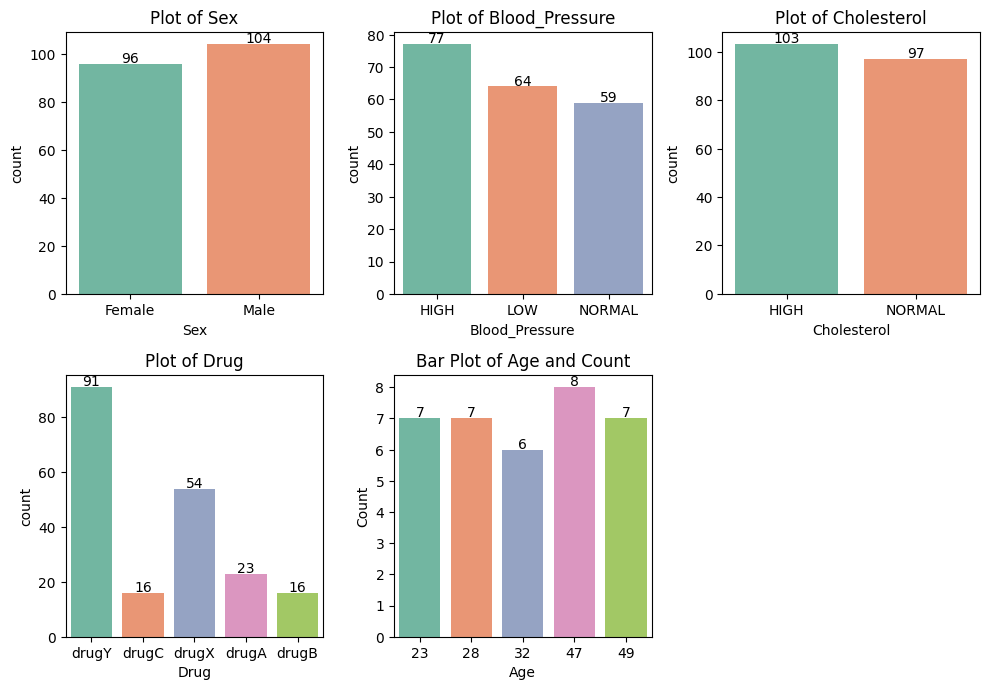

In [24]:
#11.  Tiến hành EDA dữ liệu. Sinh viên quan sát các biểu đồ và cho nhận xét
# EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')

# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'},
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()

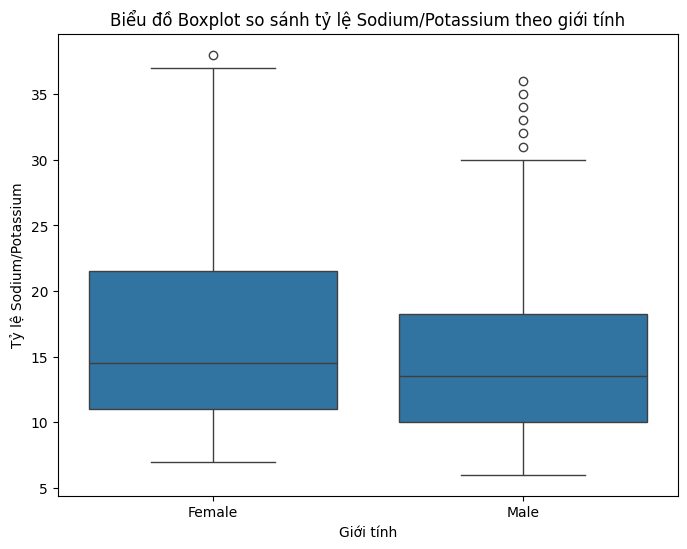

In [25]:
# 12. Tiến hành khảo sát dữ liệu outlier và cho nhận xét
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước biểu đồ
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Biểu đồ Boxplot so sánh tỷ lệ Sodium/Potassium theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỷ lệ Sodium/Potassium')
plt.show()

<h2>XÂY DỰNG MÔ HÌNH TRÍ TUỆ NHÂN TẠO</h2>

In [26]:
# 13. Tạo tập dữ liệu đặc trưng (feature) và mục tiêu (target)
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
# OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out())
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1)  # Drop the original categorical columns

# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])

In [36]:
X

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


- Thực hiện việc tiền xử lý dữ liệu cho hai biến phân loại:Sex, Blood_Pressure và Cholesterol.
- Sex được chuyển đổi thành dạng one-hot encoding, trong khi Blood_Pressure và Cholesterol được chuyển đổi thành các giá trị số nguyên bằng LabelEncoder.
- Quá trình này rất hữu ích trong machine learning vì mô hình thường không thể xử lý các biến phân loại dưới dạng văn bản.

In [29]:
# 15. Sinh viên phân tách thành tập dữ liệu train và test với tỉ lệ 60:40 , hệ số ngẫu nhiên là 42
from sklearn.model_selection import train_test_split

# Giả sử X là DataFrame chứa các đặc trưng và y là biến mục tiêu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (120, 6)
Kích thước tập kiểm tra: (80, 6)


In [30]:
# 16. Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) như sau:
# criterion=”entropy”, max_depth=6 và lamx_leaf_nodes=10. Sinh viên giải thích các siêu tham số

# Tạo mô hình Decision Tree với các siêu tham số đã chỉ định
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=10)

# Huấn luyện mô hình
dtc.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dtc.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)

Độ chính xác của mô hình: 0.9


In [31]:
classes = dtc.classes_
print("Danh sách các lớp mục tiêu:", classes)

Danh sách các lớp mục tiêu: ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


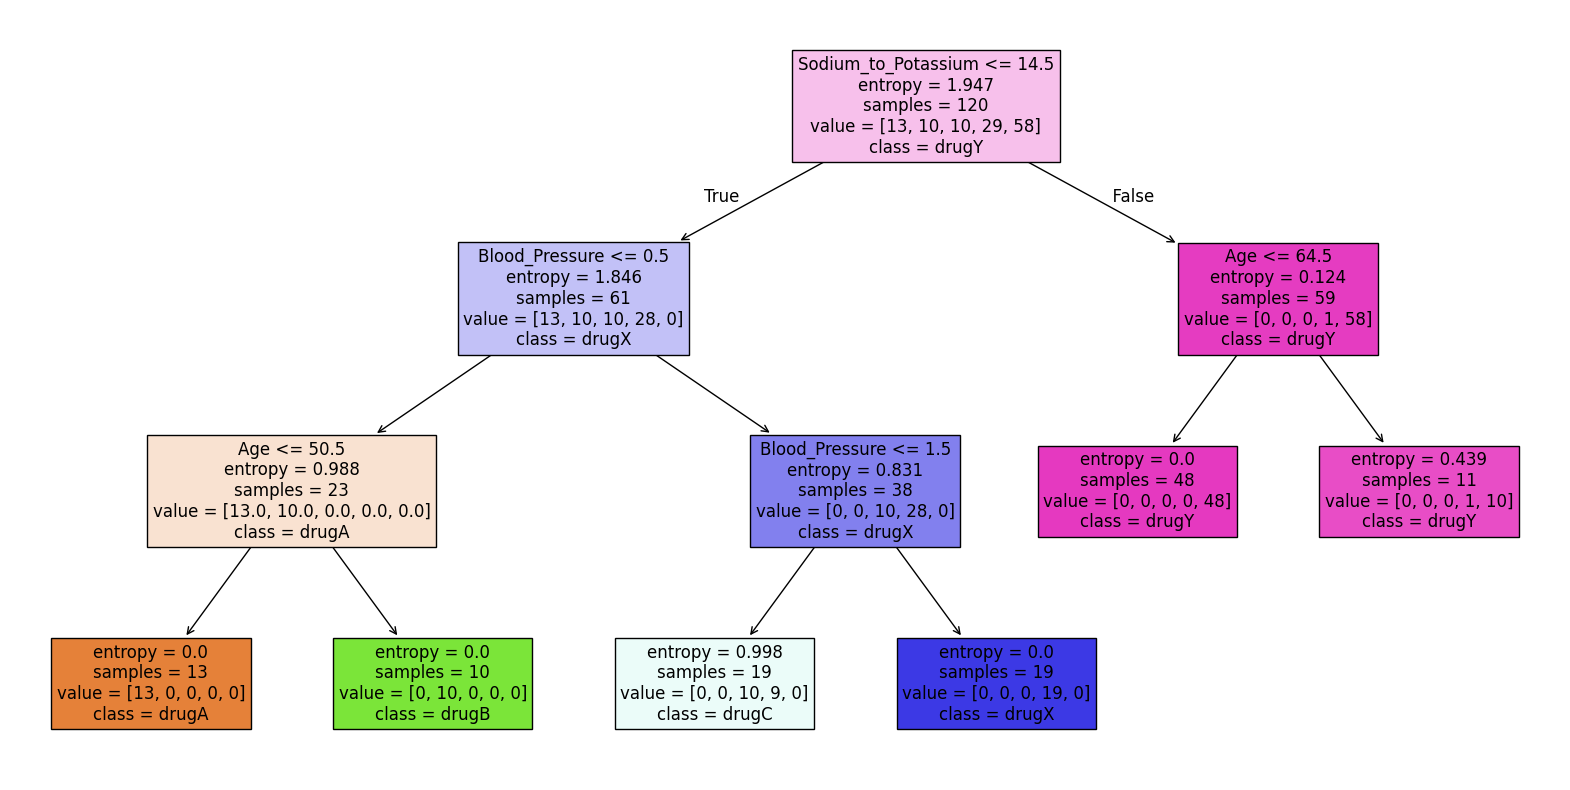

In [32]:
# 19. Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf
# Vẽ sơ đồ cây phân lớp

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dtc, 
          class_names=dtc.classes_, 
          feature_names=X.columns, 
          fontsize=12, 
          filled=True)
plt.show()

*Node:
- Gini/Entropy: Cho biết mức độ thuần khiết của node. Giá trị thấp hơn cho thấy node này chứa phần lớn mẫu thuộc cùng một lớp.
    + Số mẫu (samples): Số lượng mẫu dữ liệu tại node đó.
    + Số lớp (value): Số lượng mẫu thuộc từng lớp trong node. Ví dụ, [20, 5] có thể có 20 mẫu thuộc lớp 0 và 5 mẫu thuộc lớp 1.
    + Tỉ lệ (%): Tỉ lệ các mẫu thuộc từng lớp so với tổng số mẫu tại node.
- Leaf:
    + Giá trị cuối cùng: Leaf sẽ không phân chia thêm và đưa ra quyết định cuối cùng về lớp nào mà mẫu thuộc về. Giá trị này thường là lớp chiếm ưu thế trong leaf.
    + Số mẫu (samples): Số lượng mẫu có mặt tại leaf đó.
    + Tỉ lệ (%): Tỉ lệ các mẫu thuộc lớp chiếm ưu thế.

In [34]:
# 20. Tính Entropy có trọng số (WE) và Information Gain khi phân tách Root thành Left – Right node


ĐÁNH GIÁ MÔ HÌNH

Accuracy: 0.90
Confusion Matrix:
 [[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  8 17  0]
 [ 0  0  0  0 33]]


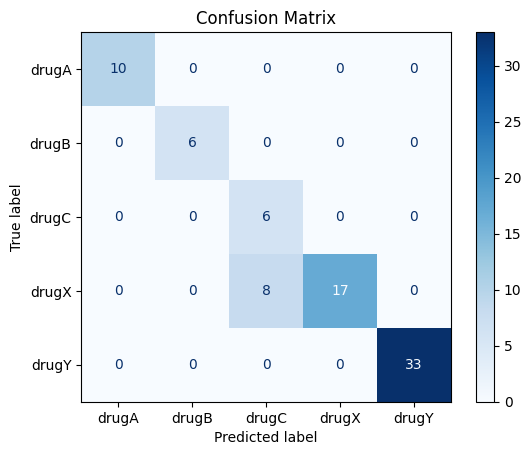

In [35]:
# 21. Sinh viên tiến hành đánh giá dựa trên các độ đo
# Dự đoán trên tập kiểm tra
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = dtc.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Tính Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
print("Confusion Matrix:\n", cm)

# Hiển thị Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [37]:
# 22. In ra bảng báo cáo các giá trị đánh giá theo từng nhóm thuốc phân lớp
from sklearn.metrics import classification_report
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       0.43      1.00      0.60         6
       drugX       1.00      0.68      0.81        25
       drugY       1.00      1.00      1.00        33

    accuracy                           0.90        80
   macro avg       0.89      0.94      0.88        80
weighted avg       0.96      0.90      0.91        80



In [ ]:
def recommend_medication(age, blood_pressure, cholesterol, sodium_to_potassium, sex):
    # Điều kiện để đưa ra loại thuốc
    if blood_pressure == 'HIGH' and cholesterol == 'HIGH':
        return "Thuốc A"
    elif blood_pressure == 'HIGH' and cholesterol == 'NORMAL':
        return "Thuốc B"
    elif blood_pressure == 'NORMAL' and cholesterol == 'HIGH':
        return "Thuốc C"
    elif sodium_to_potassium < 12:
        return "Thuốc D"
    elif age > 60 and sex == 'Female':
        return "Thuốc E"
    else:
        return "Không cần thuốc"

def main():
    # Nhập thông tin từ bàn phím
    age = int(input("Nhập tuổi (Age): "))
    blood_pressure = input("Nhập huyết áp (Blood Pressure - 'HIGH' hoặc 'NORMAL'): ").strip().upper()
    cholesterol = input("Nhập cholesterol ('HIGH' hoặc 'NORMAL'): ").strip().upper()
    sodium_to_potassium = float(input("Nhập tỷ lệ Sodium_to_Potassium: "))
    sex = input("Nhập giới tính (Sex - 'Male' hoặc 'Female'): ").strip().capitalize()

    # Gọi hàm để đề xuất thuốc
    medication = recommend_medication(age, blood_pressure, cholesterol, sodium_to_potassium, sex)

    # In ra kết quả
    print(f"Loại thuốc được cấp: {medication}")

if __name__ == "__main__":
    main()

d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


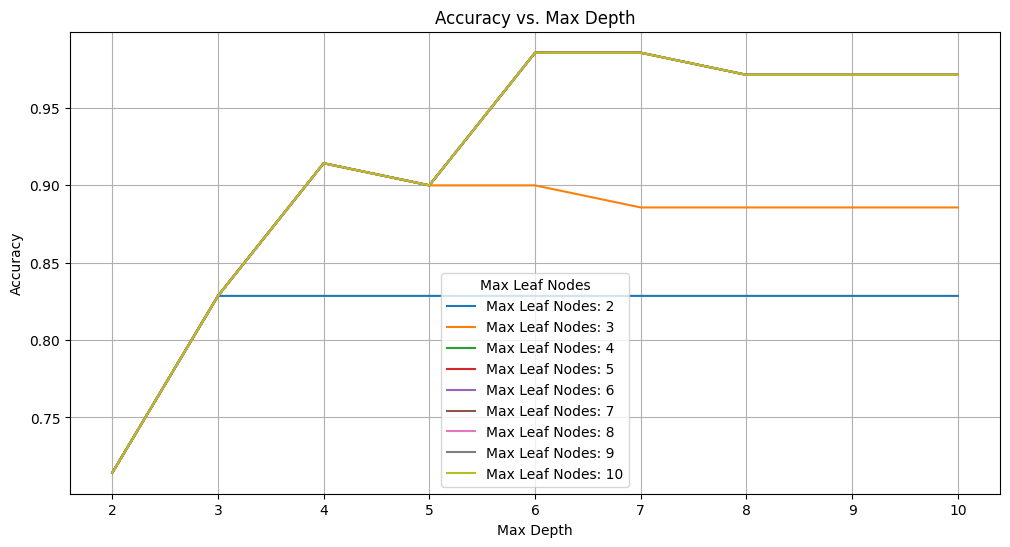

Siêu tham số tốt nhất: {'max_depth': 4, 'max_leaf_nodes': 6}, Độ chính xác tốt nhất: 0.99


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Thiết lập các giá trị cho max_depth và max_leaf_nodes
param_grid = {
    'max_depth': range(2, 11),
    'max_leaf_nodes': range(2, 11)
}

# Khởi tạo mô hình Decision Tree
dtc = DecisionTreeClassifier(random_state=42)

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy kết quả
results = grid_search.cv_results_

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 6))
for i, max_leaf in enumerate(range(2, 11)):
    plt.plot(range(2, 11), results['mean_test_score'][i*9:(i+1)*9], label=f'Max Leaf Nodes: {max_leaf}')

plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(range(2, 11))
plt.legend(title='Max Leaf Nodes')
plt.grid()
plt.show()

# In ra siêu tham số tốt nhất
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Siêu tham số tốt nhất: {best_params}, Độ chính xác tốt nhất: {best_accuracy:.2f}")

Accuracy của ID3: 0.98
Accuracy của CART: 0.98
Accuracy của C4.5 (mô phỏng): 0.98


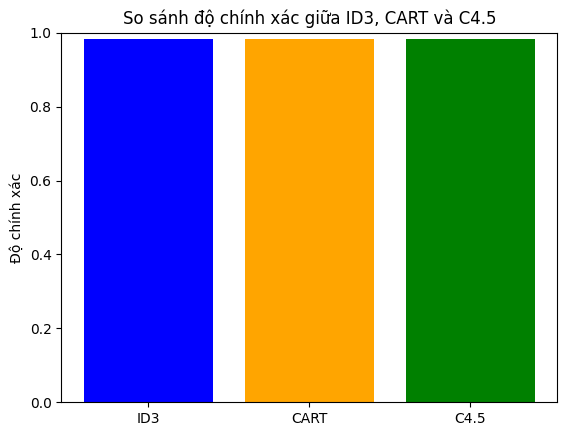

In [40]:
# 25. Sinh viên tìm hiểu giải thuật C4.5 (sử dụng Gain Ratio) và CART (sử dụng Gini Impurity) sau đó
# cài đặt với các mô hình đó, rồi so sánh với giải thuật ID3 dựa trên độ đo đánh giá accuracy

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cài đặt mô hình ID3 (criterion='entropy')
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
id3_pred = id3_model.predict(X_test)
id3_accuracy = accuracy_score(y_test, id3_pred)

# Cài đặt mô hình CART (criterion='gini')
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)
cart_pred = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_pred)

# Cài đặt mô hình C4.5 (mô phỏng với criterion='entropy')
c45_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_model.fit(X_train, y_train)
c45_pred = c45_model.predict(X_test)
c45_accuracy = accuracy_score(y_test, c45_pred)

# In ra độ chính xác
print(f"Accuracy của ID3: {id3_accuracy:.2f}")
print(f"Accuracy của CART: {cart_accuracy:.2f}")
print(f"Accuracy của C4.5 (mô phỏng): {c45_accuracy:.2f}")

# Biểu đồ so sánh
models = ['ID3', 'CART', 'C4.5']
accuracies = [id3_accuracy, cart_accuracy, c45_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác giữa ID3, CART và C4.5')
plt.show()

In [43]:
target_names

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

In [41]:
# 26. Giải sử drugX là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử
# dụng) tức là bệnh rất nghiêm trọng mới cần sử dụng. Hãy đánh giá các giá trị bên dưới trên nhóm
# phân lớp drugX và cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế
# cấp thuốc drugX?
# a. Accuracy
# b. Confusion matrix
# c. [tn, fp, fn, tp]
# d. [TPR, FNR, FPR, TNR]
# e. [precision, recal, F1]
# f. Đồ thị AUC & ROC

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Chuyển đổi lớp để phù hợp với drugX (giả sử lớp 2 là drugX)
# Đặt 1 cho drugX và 0 cho không drugX
y = np.where(y == 2, 1, 0)  # Giả định drugX là lớp 2

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Tỉ lệ xác suất cho drugX

# Tính toán các chỉ số
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Tính TPR, FNR, FPR, TNR
TPR = tp / (tp + fn)  # True Positive Rate
FNR = fn / (tp + fn)  # False Negative Rate
FPR = fp / (fp + tn)  # False Positive Rate
TNR = tn / (tn + fp)  # True Negative Rate

# Tính precision, recall, F1
precision = tp / (tp + fp)
recall = TPR  # Recall chính là TPR
f1 = 2 * (precision * recall) / (precision + recall)

# Tính AUC & ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# In ra kết quả
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print(f"[TN, FP, FN, TP]: [{tn}, {fp}, {fn}, {tp}]")
print(f"[TPR, FNR, FPR, TNR]: [{TPR:.2f}, {FNR:.2f}, {FPR:.2f}, {TNR:.2f}]")
print(f"[Precision, Recall, F1]: [{precision:.2f}, {recall:.2f}, {f1:.2f}]")
print(f"AUC: {roc_auc:.2f}")

# Vẽ đồ thị ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1